In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [0]:
def divvy_pop(population, prop):
    '''
    Divide susceptible population into quarantine and non-quarantine
    
    Inputs:
    population: int
    prop: proportion of people who quarantine themselves

    Return: tuple (quarantined, non-quarantined)
    '''

    quarantined = population * prop
    non_quarantined = population - quarantined

    return quarantined, non_quarantined


In [0]:
def visualize_model(init_states, Tmax, beta, gamma, q_prop):
    '''
    Visualize the change in total of susceptibles, infectious, recovered population. 
    A maximum of infectious population will also be identified and returned. 

    init_states: tuple of initial (S, I, R)
    Tmax: the duration of the epidemic
    beta: normal rate of transmission
    gamma: rate of recovery
    q_prop: proportion of people quarantined
    '''
    # Generate variables:
    ## unpack state variables
    S_init, I_init, R_init = init_states 
    N = S_init + I_init + R_init

    # Set up the time array
    dt = 1    # day
    #Niter = int(Tmax/dt) #determine the number of iterations
    time = range(0,Tmax + 1,dt) # preallocate the time array

    # Set up S, I, R arrays
    S = [0] * (Tmax + 1)    # preallocate the solution array
    I = [0] * (Tmax + 1)
    R = [0] * (Tmax + 1)

    # Solve each ODE using Forward Euler
    for i in range(Tmax):
      
      S[0] = S_init
      I[0] = I_init
      R[0] = R_init

      ## dividing S and I into quarantined and non-quarantined:
      Sq, Snq = divvy_pop(S[i], q_prop)
      Iq, Inq = divvy_pop(I[i], q_prop)

      # sample beta from a distribution
      beta_sim = np.random.normal(beta, 0.25)
      beta_less = beta_sim * 0.5

      dSdt = -(beta_less*Sq*Iq + beta_sim*Sq*Inq + beta_less*Snq*Iq + beta_sim*Snq*Inq)/N
      S[i+1] = S[i] + dt*dSdt

      dIdt = (beta_less*Sq*Iq + beta_sim*Sq*Inq + beta_less*Snq*Iq + beta_sim*Snq*Inq)/N - gamma*I[i]
      I[i+1] = I[i] + dt*dIdt

      dRdt = gamma * I[i]
      R[i+1] = R[i] + dt*dRdt

    plt.plot(time, S, 'g', label="S(t)")
    plt.plot(time, I, 'r', label="I(t)")
    plt.plot(time, R, 'b', label="R(t)")
    plt.hlines(41333, 0, Tmax,'y', label="hospital capacity")

    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.title("Effects of " + str(q_prop) + " Quarantine with Initial population " + str(init[1]))
    plt.legend()
    plt.show()

    print('Maximum infected = ' + str(max(I)))

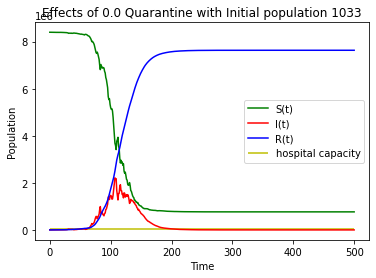

Maximum infected = 2213620.5842075297


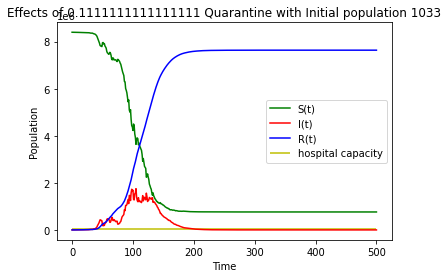

Maximum infected = 1752188.1792291012


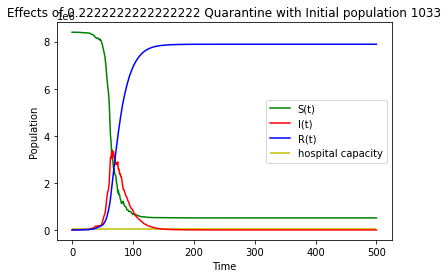

Maximum infected = 3344123.112023647


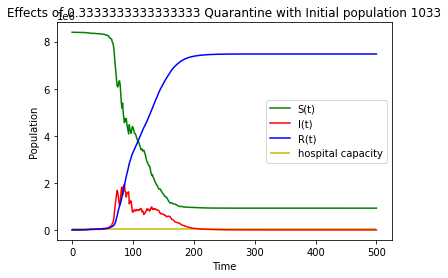

Maximum infected = 1940483.1672087836


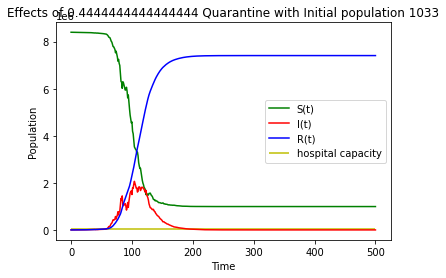

Maximum infected = 2064523.1941715474


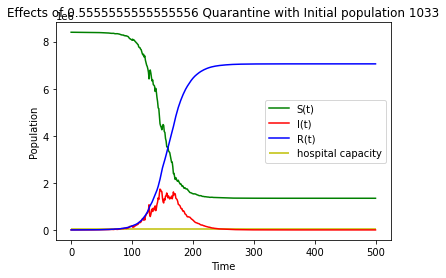

Maximum infected = 1733720.2299803738


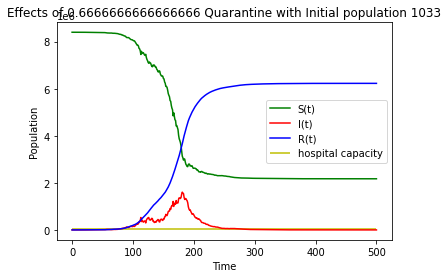

Maximum infected = 1604189.6632956837


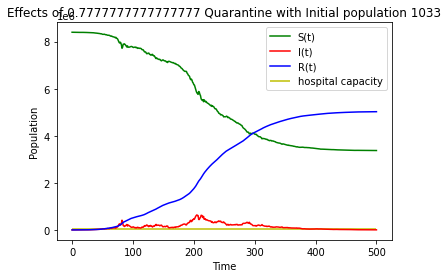

Maximum infected = 637691.592504163


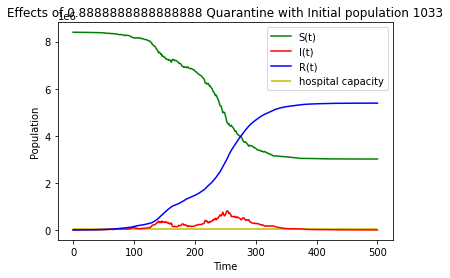

Maximum infected = 815663.6583797288


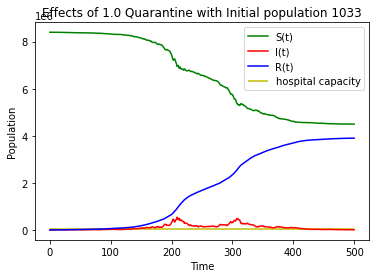

Maximum infected = 539415.0304114844


In [7]:
 # NYC
# Varying the proportion of quarantined population

# 1033 is the number infected when shelter order was issued
init = (8399000, 1033, 0)

# beta has normal distribution
# use np.random.normal()
beta = 3/14
sd_b = 0.03

# gamma has normal distribution
gamma = 1/14

# Generate a number of plots with varying quarantined population
props = np.linspace(0, 1, 10)
for q_prop in props:
  visualize_model(init, 500, beta, gamma, q_prop)

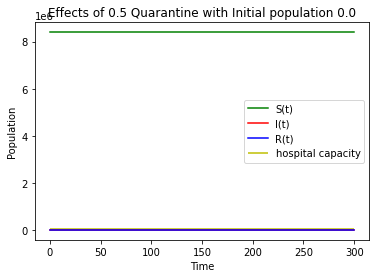

Maximum infected = 0.0


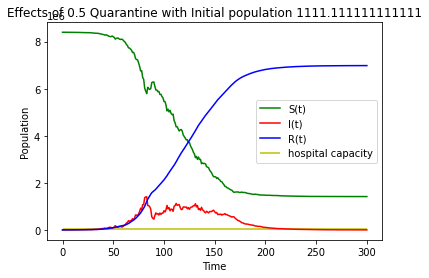

Maximum infected = 1406898.9375782066


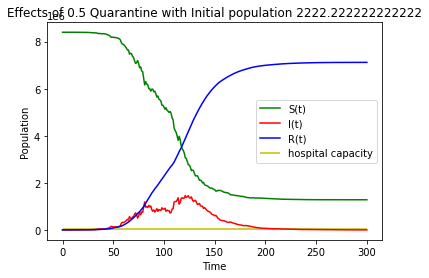

Maximum infected = 1459917.5806919795


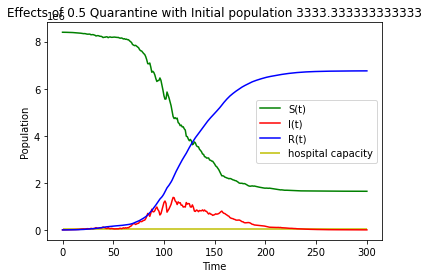

Maximum infected = 1381183.772706083


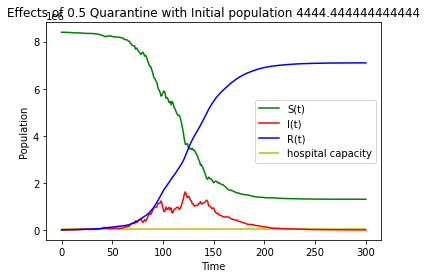

Maximum infected = 1618575.3067336907


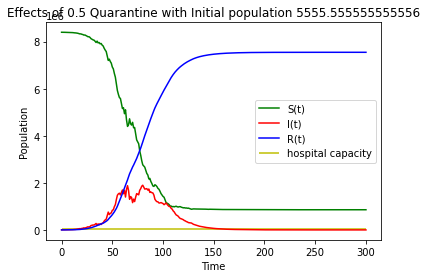

Maximum infected = 1899112.1343497292


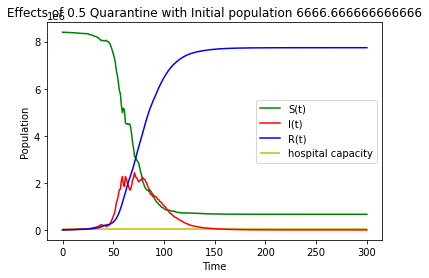

Maximum infected = 2427556.2206347324


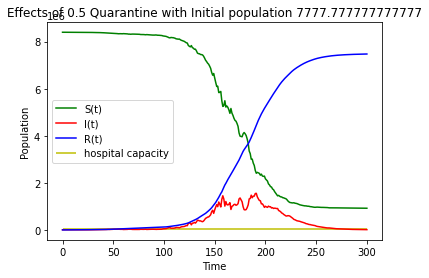

Maximum infected = 1554755.0126168882


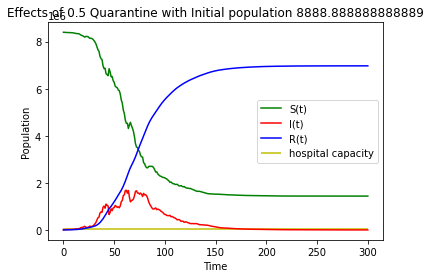

Maximum infected = 1683595.6979983095


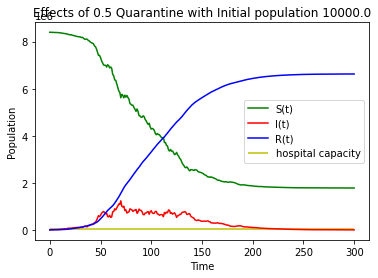

Maximum infected = 1235882.9364292978


In [8]:
# NYC
# Varying the initial infected population

# 1033 is the number infected when shelter order was issued
init_pop = np.linspace(0, 10000, 10)
lst_init = []
for pop in init_pop:
  init = (8399000, pop, 0)
  lst_init.append(init)

# parameters:
beta = 3/14
sd_b = 0.03
gamma = 1/14
q_prop = 0.5

# Generate a number of plots with varying quarantined population
for init in lst_init:
  visualize_model(init, 300, beta, gamma, q_prop)